# 本次练习目的
1、使用sklearn数据集训练逻辑回归模型；
2、调整学习率，样本数据拆分比率，观察训练结果；
3、训练后模型参数保存到文件，在另一个代码中加载参数实现预测功能；
4、总结逻辑回归运算及训练相关知识点




## 1、使用sklearn数据集训练逻辑回归模型；相关代码如下

In [ ]:
#使用make_classification创建数据集

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
##第一步，数据准备，有时需要预处理
X,y=make_classification(n_samples=100,n_features=10)
##数据拆分为训练数据和测试数据
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.6)
# print(X_test.shape)查看训练数据分类后的形状
# print(X_train.shape)
##设置初始权重参数，超参数，训练轮次
#权
theta = np.random.randn(1,10)#生成形状为（1，10）的正态分布数组
bias = 0
#超
lr = 0.01
#轮
epochs = 4000

##第二步，模型运算(前向运算)

def forward(x,theta,bias):
    #线性运算 可以理解为z = theta*X + bias，下方是矩阵形式，X是一个样本所有的特征值之和
    z = np.dot(theta,x.T) + bias#theta是（1，10），训练数据x是（80，10），矩阵乘法原因，需x转置之后才能运算
    #sigmoid,激活函数，将y_hat转换为对应概率值
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

##第三步，计算损失，且损失函数公式一般都由模型直接给出,本周学习用的是伯努利二分步对数损失函数
def loss(y , y_hat) :
    eposion = 1e-8
    return - y * np.log( y_hat + eposion ) - ( 1 - y) * np.log( 1 -y_hat )

## 第四步，计算梯度，求导，公式经由损失函数推出
def calc_gradient(x,y,y_hat) :
    m = x.shape[-1]#要用中括号
    delta_theta = np.dot((y_hat - y), x ) / m
    delta_bias = np.mean(y_hat - y)
    return delta_theta,delta_bias
## 第五步，更新参数，重复训练（需要用到学习率）
for i in range(epochs):
    # 前向计算
    y_hat = forward(X_train, theta, bias)
    # 计算损失
    loss_val = loss(y_train, y_hat)
    # 计算梯度
    delta_theta, delta_bias = calc_gradient(X_train, y_train, y_hat)
    # 更新参数
    theta = theta - lr * delta_theta
    bias = bias - lr * delta_bias

    if i % 100 == 0:
        # 计算准确率
        acc = np.mean(np.round(y_hat) == y_train)  # [False,True,...,False] -> [0,1,...,0]
        print(f"epoch: {i}, loss: {np.mean(loss_val)}, acc: {acc}")
        

epoch: 0, loss: 1.9599791431817668, acc: 0.275
epoch: 100, loss: 0.20727524272229064, acc: 0.925
epoch: 200, loss: 0.09952397527942906, acc: 1.0
epoch: 300, loss: 0.06761241758626649, acc: 1.0
epoch: 400, loss: 0.05186177534773138, acc: 1.0
epoch: 500, loss: 0.04231574368053575, acc: 1.0
epoch: 600, loss: 0.03585666304876666, acc: 1.0
epoch: 700, loss: 0.03117363029005732, acc: 1.0
epoch: 800, loss: 0.027612472383512544, acc: 1.0
epoch: 900, loss: 0.024807877155773147, acc: 1.0
epoch: 1000, loss: 0.02253887738085033, acc: 1.0
epoch: 1100, loss: 0.020663568068510364, acc: 1.0
epoch: 1200, loss: 0.019086462068594788, acc: 1.0
epoch: 1300, loss: 0.017740850811307746, acc: 1.0
epoch: 1400, loss: 0.016578671072296648, acc: 1.0
epoch: 1500, loss: 0.015564387019848724, acc: 1.0
epoch: 1600, loss: 0.014671141013391755, acc: 1.0
epoch: 1700, loss: 0.013878246069310093, acc: 1.0
epoch: 1800, loss: 0.01316950295194264, acc: 1.0
epoch: 1900, loss: 0.012532041169415406, acc: 1.0
epoch: 2000, loss: 

In [41]:
#导入iris数据集，进行训练
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
#1、数据处理
iris = load_iris()
X = iris.data[:100, :]  # 前 100 个样本，所有 4 个属性
y = iris.target[:100]   # 前 100 个样本的标签
##数据拆分为训练数据和测试数据
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.6)
# print(X_test.shape)查看训练数据分类后的形状
# print(X_train.shape)
##设置初始权重参数，超参数，训练轮次
#权
theta = np.random.randn(1,4)#生成形状为（1，10）的正态分布数组
bias = 0
#超
lr = 0.01
#轮
epochs = 4000

##第二步，模型运算(前向运算)

def forward(x,theta,bias):
    #线性运算 可以理解为z = theta*X + bias，下方是矩阵形式，X是一个样本所有的特征值之和
    z = np.dot(theta,x.T) + bias#theta是（1，10），训练数据x是（80，10），矩阵乘法原因，需x转置之后才能运算
    #sigmoid,激活函数，将y_hat转换为对应概率值
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

##第三步，计算损失，且损失函数公式一般都由模型直接给出,本周学习用的是伯努利二分步对数损失函数
def loss(y , y_hat) :
    eposion = 1e-8
    return - y * np.log( y_hat + eposion ) - ( 1 - y) * np.log( 1 -y_hat )

## 第四步，计算梯度，求导，公式经由损失函数推出
def calc_gradient(x,y,y_hat) :
    m = x.shape[-1]#要用中括号
    delta_theta = np.dot((y_hat - y), x ) / m
    delta_bias = np.mean(y_hat - y)
    return delta_theta,delta_bias
## 第五步，更新参数，重复训练（需要用到学习率）
for i in range(epochs):
    # 前向计算
    y_hat = forward(X_train, theta, bias)
    # 计算损失
    loss_val = loss(y_train, y_hat)
    # 计算梯度
    delta_theta, delta_bias = calc_gradient(X_train, y_train, y_hat)
    # 更新参数
    theta = theta - lr * delta_theta
    bias = bias - lr * delta_bias

    if i % 500 == 0:
        # 计算准确率
        acc = np.mean(np.round(y_hat) == y_train)  # [False,True,...,False] -> [0,1,...,0]
        print(f"epoch: {i}, loss: {np.mean(loss_val)}, acc: {acc}")

epoch: 0, loss: 3.3553031038909333, acc: 0.55
epoch: 500, loss: 0.014736214709908855, acc: 1.0
epoch: 1000, loss: 0.007818166030047351, acc: 1.0
epoch: 1500, loss: 0.005395965710856491, acc: 1.0
epoch: 2000, loss: 0.0041467644932795715, acc: 1.0
epoch: 2500, loss: 0.0033798502997489494, acc: 1.0
epoch: 3000, loss: 0.0028591624245286537, acc: 1.0
epoch: 3500, loss: 0.0024815758665766544, acc: 1.0


## 2、调整学习率，样本数据拆分比率，观察训练结果；
### 使用make_classification创建数据集
(1)lr=0.01,text_size=0.2
![alt text](image-1.png) 

(2)lr=0.05 ,text_size=0.2
![alt text](image.png)

(3)lr=0.10 ,text_size=0.2
![alt text](image-2.png)

(4)lr=0.01 ,text_size=0.3
![alt text](image-3.png)

(5)lr=0.01 ,text_size=0.5
![alt text](image-4.png)

(6)lr=0.01 ,text_size=0.6
![alt text](image-5.png)

### 使用irir数据集
(1)lr=0.01,text_size=0.2
![alt text](image-6.png)

(2)lr=0.05 ,text_size=0.2
![alt text](image-7.png)

(3)lr=0.10 ,text_size=0.2
![alt text](image-8.png)

(4)lr=0.01 ,text_size=0.3
![alt text](image-9.png)

(5)lr=0.01 ,text_size=0.5
![alt text](image-10.png)

(6)lr=0.01 ,text_size=0.6
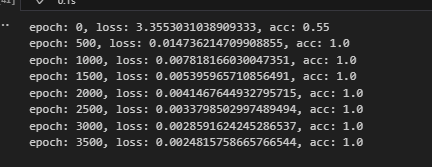

## 3、训练后模型参数保存到文件，在另一个代码中加载参数实现预测功能；
图像演示如下：
(1)将测试文件改为.py文件

![alt text](image-11.png)

(2)在test01中导入test00

![alt text](image-12.png)

(3)进行相关操作即可

![alt text](image-13.png)




## 4、总结逻辑回归运算及训练相关知识点
### 为什么要学习逻辑回归？
神经⽹络是⼈⼯智能深度学习的基础，也是⽬前主流⽹络模型应⽤最多的基础架构。通常学习神经⽹络最好的⼊⻔⽅法也是先学习逻辑回归，⽽后进⼀步认识神经元和整 体的⽹络训练。
### 逻辑回归是什么？流程是怎样的？需要注意什么呢？
(1)逻辑回归就是将线性回归模型映射为概率的模型,把y实数空间的输出[负无穷~正无穷]映射到取值为[0，1]的区间, 从⽽把模型的输出值转 换为概率值,本次学习的转换函数为sigmoid
(2)流程如下：
   1. 数据准备，参数初始化
   可以采用sklearn.database
   2. 前向计算 
      - **前向运算**：从输入数据到预测概率的计算过程，包括线性变换和激活函数。
      - **作用**：生成模型预测值，为损失计算和反向传播提供基础。
      - **逻辑回归**：通过 Sigmoid 函数将线性输出映射为概率值，用于二分类任务
   3. 计算损失 
   使用损失函数计算，本次直接给出，使用的是伯努利分布，用的是其对数形式，方便减少运算量
   4. 计算梯度
   目的是最小化损失函数，找到最优参数
   5. 更新参数
   通过学习率和梯度来不断更新参数，其中学习率是经验所得，用于控制参数更新的步长，本次练习中，就是theta不断通过变化，以求得最优参数

(3)练习中需要注意的点

   1、导入数据时要清楚数据的大小形状，以便后面调用

   2、定义函数时要把其中的参数顺序与引用时的顺序确定好，不然就会出错

   3、学习率不能过大，否则会溢出，报错时，可以使用try except 来解决

   4、ipynb不能导入其他文件中引用，应该改成.py形式才能进行引进用

   5、一些概念和区分

      (1)最⼤似然估计和损失函数

         最大似然估计是一种通过最大化似然函数来估计最优模型参数的方法。

         损失函数衡量模型预测值与真实值之间的差异

         梯度下降法的作⽤就是：最⼩化⼀个损失函数

         似然函数：衡量在给定参数下观测数据出现的可能性。

         对数似然函数：简化计算，常用于实际优化。
      (2)概率和似然的区别

         概率（Probably），是在已知⼀些概率分布参数的情况下，预测观测值的结果;  **知道参数，在不同x条件下预测y**

         似然（Likelihood），则是⽤于在已知某些观测值所得到的结果时，对观测结果所属的 概率分布参数进⾏估计。**知到x，在不同参数条件下预测y**
         
      (3)梯度与学习率的关系

         梯度：指示损失函数的变化方向和速率。

         学习率：一个超参数,用于控制参数更新的步长。

      [^超参数（Hyperparameters）]: 是指那些在训练过程开始之前就需要**⼿动设置的参数**，它们不能通过模型从数据中学习得 到，⽽是需要通过⼈为的经验、实验或者特定的搜索⽅法来进 ⾏选择和调整。

      关系：学习率决定梯度对参数更新的影响程度，合适的学习率能平衡收敛速度和稳定性。

### 一些听课过程中和预习时的疑问的解答
   1.线性回归的y值是怎么映射到【0，1】之间的？

   比如说是sigmoid激活函数来进行逻辑回归，是通过sigmoid计算公式对线性回归中同一组数据的x进行运算后的概率值对应原本数据中的由x进行线性回归运算得到的y，是这样的么？
   **不是，是线性运算得到的y是sigmoid函数中的自变量，每一个y对应一个点**

   2.该怎么理解iris数据集中的x和y呢？所得出的0，1等是什么呢？
   
   x是x（n_sample,n_feature），shape是（150，4）,y(n_sample)，shape是（150）

   3.定义损失函数时的return返回的数值放在哪呢？具体过程是什么样的？为什么要防止y-hat的值为0√

   log函数自变量不能为0

   4.为什么不能使用全部训练样本训练模型呢？

   答：会造成过拟合问题，也就是当模型训练好了，使用新样本效果不好（泛化能力插）

